# Web Scraping with Beautiful Soup

### codecademy project with chocolate reveiws

You’ve found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.

The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in this review guide. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

Some questions we thought about when we found this dataset were: Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating?

Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

In [3]:
import seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Request HTML

Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.
The URL is: https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
You can pass this into the .get() method of the requests module to get the HTML.

In [4]:
rawHTML = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

#### Create Beautiful Soup

Create a BeautifulSoup object called soup to traverse this HTML.
Use "html.parser" as the parser, and the content of the response you got from your request as the document.

In [6]:
soup = BeautifulSoup(rawHTML.content, "html.parser")

#### Pull out the "Rating" classes from the HTML table


How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.

The first thing to do is to put all of the ratings into a list.

Use a command on the soup object to get all of the tags that contain the ratings.

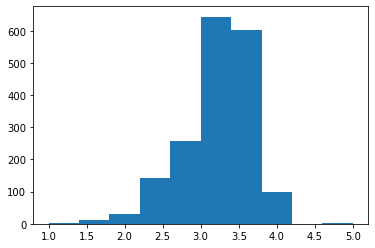

In [14]:
raw_ratings = soup.find_all(attrs={"class": "Rating"})   # This gives lots of tags like <td class="Rating">2.25</td>

ratings = []
for td in raw_ratings:
  ratings.append(td.get_text())   # This takes each tag and adds the text content to a list

# Now we convert each list element to a float, ignoring the first element which is the string 'Rating'.
ratings = [float(ratings[i]) for i in range(1, len(ratings))]   

# We now plot a histogram of the ratings
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

#### Pull out company names from HTML

First, let’s find all the tags on the webpage that contain the company names.

In [15]:
raw_names = soup.find_all(attrs={"class": "Company"})
company_names = []
for td in raw_names:
  company_names.append(td.get_text())
company_names = [company_names[i] for i in range(1, len(company_names))]  

#### Create a dataframe

Create a DataFrame with a column “Company” corresponding to your companies list, and a column “Ratings” corresponding to your ratings list.

In [44]:
d = {
    "Company": company_names,
    "Rating": ratings
    }

choc_df = pd.DataFrame.from_dict(d)

In [25]:
print(choc_df)

       Company  Rating
0     A. Morin    3.75
1     A. Morin    2.75
2     A. Morin    3.00
3     A. Morin    3.50
4     A. Morin    3.50
...        ...     ...
1790    Zotter    3.75
1791    Zotter    3.00
1792    Zotter    3.50
1793    Zotter    3.25
1794    Zotter    3.00

[1795 rows x 2 columns]


#### Group by company name

Use .groupby to group your DataFrame by Company and take the average of the grouped ratings.

In [29]:
mean_ratings = choc_df.groupby("Company").Rating.mean()
print(mean_vals)

Company
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Rating, Length: 416, dtype: float64


#### find the highest rated companies

Then, use the .nlargest command to get the 10 highest rated chocolate companies. Print them out.

In [30]:
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


## Is more cacao better?


We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao. It looks like the cocoa percentages are in the table under the Cocoa Percent column.

#### Pull out percentages from the HTML table

Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as an integer, after stripping off the % character.

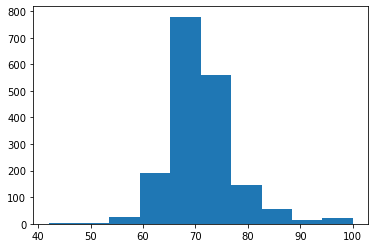

In [37]:
raw_pcs = soup.find_all(attrs={"class": "CocoaPercent"})
pcs = []
for td in raw_pcs:
  pcs.append(td.get_text().strip('%'))   # This takes each tag and adds the text content to a list

# Now we convert each list element to a float, ignoring the first element which is the string 'Cocoa Percent'.
pcs = [float(pcs[i]) for i in range(1, len(pcs))]  

# We now plot a histogram of the ratings
plt.hist(pcs)
plt.show()

#### Add the cocoa percentages to the dataframe

Add the cocoa percentages as a column called "CocoaPercentage" in the DataFrame that has companies and ratings in it.

In [45]:
choc_df.insert(2, "Cocoa Percent", pcs)
print(choc_df)

       Company  Rating  Cocoa Percent
0     A. Morin    3.75           63.0
1     A. Morin    2.75           70.0
2     A. Morin    3.00           70.0
3     A. Morin    3.50           70.0
4     A. Morin    3.50           70.0
...        ...     ...            ...
1790    Zotter    3.75           70.0
1791    Zotter    3.00           65.0
1792    Zotter    3.50           65.0
1793    Zotter    3.25           62.0
1794    Zotter    3.00           65.0

[1795 rows x 3 columns]


#### Scatter plot

Make a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage).

Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

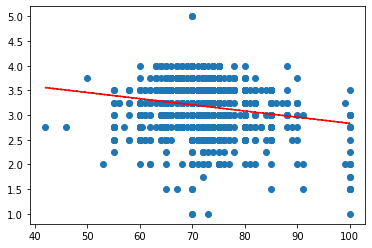

In [53]:
plt.scatter(choc_df["Cocoa Percent"], choc_df["Rating"])

z = np.polyfit(choc_df["Cocoa Percent"], choc_df["Rating"], 1)
line_function = np.poly1d(z)
plt.plot(choc_df["Cocoa Percent"], line_function(choc_df["Cocoa Percent"]), "r--")

plt.show()